# Scikit-learn pipelines and custom transformers/estimators

#### 07.03.2018
Przemysław Pobrotyn

<img src="figures/sigmoidal.jpg" width="300" height="300" align="right" />

### Quick recap of sklearn's API

###### Built-in popular datasets

In [5]:
from sklearn import datasets
digits = datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

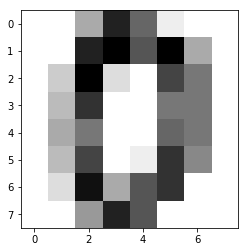

In [29]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
plt.show()

###### Supervised learning

In [8]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

![title](figures/svm.png)

In [16]:
clf.fit(digits.data[:-1], digits.target[:-1])  

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
clf.predict(digits.data[-1:])

array([8])

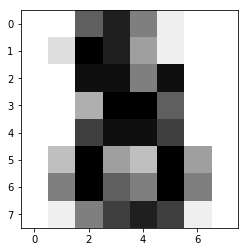

In [26]:
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)
plt.show()

###### Unsupervised learning

In [120]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

# rescale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# decompose
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)

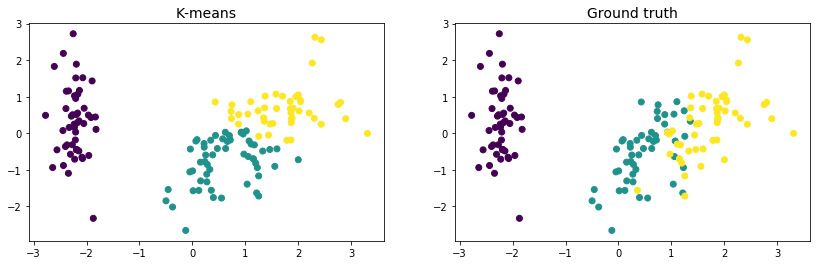

In [122]:
# fit k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusters = kmeans.labels_
# kmeans.predict(new_data)

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.scatter(X_reduced[:,0],X_reduced[:,1], c=clusters)
plt.title('K-means', fontsize=14)
plt.subplot(1,2,2)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)
plt.title('Ground truth', fontsize=14)
plt.show()

###### Model selection and evaluation tools

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [100]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [113]:
clf = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1_micro')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=0)

In [114]:
clf.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [115]:
clf.best_score_

0.9902574808629089

In [116]:
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.97      1.00      0.99        35
          2       1.00      1.00      1.00        36
          3       1.00      1.00      1.00        29
          4       1.00      1.00      1.00        30
          5       0.97      0.97      0.97        40
          6       1.00      1.00      1.00        44
          7       1.00      1.00      1.00        39
          8       1.00      0.97      0.99        39
          9       0.98      0.98      0.98        41

avg / total       0.99      0.99      0.99       360



Sklearn provides many more model selection and evaluation tools: cross validation tools, data splitting tools (`GroupShuffleSplit`, `TimeSeriesSplit`), randomized grid search, various metrics, ROC curves, precision/recall curves, learning/validation curves etc.

![title](figures/sklearn_docs.png)

Typical supervised learning workflow:

![title](figures/workflow1.png)

![title](figures/workflow2.png)

Possible problems:
* a lot of hyperparams to tune -> fugly code with embedded loops
* data leakage, eg: standarizing on test data when doing cross validation
* having to manually string a lot of transformers together

Some pseudocode example:

In [ ]:
input_data
x, y = transform_1(input_data)
x, y = transform_2(x, y)
etc
x, y = transform_n(x, y)
model.fit(x,y)

Example of badly written grid search on such a string of transformations:

![title](figures/bad_code.png)

### SOLUTION
*Pipelines* to the rescue!

From sklearn's documentation:

Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves three purposes here:

* **Convenience and encapsulation** - You only have to call `fit` and `predict` once on your data to fit a whole sequence of estimators.
* **Joint parameter selection** - You can grid search over parameters of all estimators in the pipeline at once.
* **Safety** - Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

**All estimators in a pipeline, except the last one, must be transformers (i.e. must have a `transform` method). The last estimator may be any type (transformer, classifier, etc.).**

#### Simple example:

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC

estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = Pipeline(estimators)
pipe

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Another tool to create piplines:

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer
make_pipeline(Binarizer(), MultinomialNB()) 

Pipeline(memory=None,
     steps=[('binarizer', Binarizer(copy=True, threshold=0.0)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

Accessing estimators and their hyperparameters:

In [3]:
pipe.steps[0]

('reduce_dim',
 PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False))

In [4]:
pipe.named_steps['reduce_dim']

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
pipe.named_steps['reduce_dim'].svd_solver

'auto'

Parameters of the estimators in the pipeline can be accessed using the <estimator>__<parameter> syntax:

In [6]:
pipe.get_params()['clf']

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
pipe.set_params(clf__C=10) 

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

#### Grid search with a pipeline
This notation is mostly used for doing grid searches.

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(reduce_dim__n_components=[2, 5, 10], clf__C=[0.1, 10, 100])
grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'reduce_dim__n_components': [2, 5, 10], 'clf__C': [0.1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

We can even substitute individual steps of the pipeline, and ignore them if necessary by setting them to `None`.

In [10]:
from sklearn.linear_model import LogisticRegression
param_grid = dict(reduce_dim=[None, PCA(5), PCA(10)],
                  clf=[SVC(), LogisticRegression()],
                   clf__C=[0.1, 10, 100])
grid_search = GridSearchCV(pipe, param_grid=param_grid)

Calling `fit` on the pipeline is the same as calling `fit` on each estimator in turn, transform the input and pass it on to the next step. The pipeline has all the methods that the last estimator in the pipeline has, i.e. if the last estimator is a classifier, the Pipeline can be used as a classifier. If the last estimator is a transformer, again, so is the pipeline.

#### Caching transformers

Fitting transformers may be computationally expensive. With its memory parameter set, Pipeline will cache each transformer after calling `fit`. A typical example is the case of a grid search in which the transformers can be fitted only once and reused for each configuration.

The parameter `memory` is needed in order to cache the transformers. `memory` can be either a string containing the directory where to cache the transformers or a `joblib.Memory` object (see https://pythonhosted.org/joblib/memory.html for details):

In [12]:
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
cachedir = mkdtemp()
pipe = Pipeline(estimators, memory=cachedir)
pipe

Pipeline(memory='/var/folders/3p/6tvd1q517d3_bm8z5fbtd4p80000gn/T/tmpjfztovcu',
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [13]:
rmtree(cachedir)

#### Warning! Side effect of caching transformers

Inspecting a fitted pipeline with caching disabled:

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
pca1 = PCA()
svm1 = SVC()
pipe = Pipeline([('reduce_dim', pca1), ('clf', svm1)])
pipe.fit(digits.data, digits.target)

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [21]:
# The pca instance can be inspected directly
print(pca1.components_)

[[ -1.77484909e-19  -1.73094651e-02  -2.23428835e-01 ...,  -8.94184677e-02
   -3.65977111e-02  -1.14684954e-02]
 [  3.27805401e-18  -1.01064569e-02  -4.90849204e-02 ...,   1.76697117e-01
    1.94547053e-02  -6.69693895e-03]
 [ -1.68358559e-18   1.83420720e-02   1.26475543e-01 ...,   2.32084163e-01
    1.67026563e-01   3.48043832e-02]
 ..., 
 [ -0.00000000e+00   1.24542422e-16   3.75737130e-16 ...,   1.10631603e-16
   -5.75432090e-17  -7.40228347e-17]
 [  0.00000000e+00   1.90890701e-16  -7.82648298e-17 ...,  -4.23467114e-18
   -7.42124207e-17   1.32700914e-16]
 [  1.00000000e+00  -1.68983002e-17   5.73338351e-18 ...,   8.66631300e-18
   -1.57615962e-17   4.07058917e-18]]


Enabling caching triggers a clone of the transformers before fitting. Therefore, the transformer instance given to the pipeline cannot be inspected directly. 

In [22]:
cachedir = mkdtemp()
pca2 = PCA()
svm2 = SVC()
cached_pipe = Pipeline([('reduce_dim', pca2), ('clf', svm2)],
                         memory=cachedir)
cached_pipe.fit(digits.data, digits.target)

Pipeline(memory='/var/folders/3p/6tvd1q517d3_bm8z5fbtd4p80000gn/T/tmp4_5xekb7',
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [24]:
print(pca2.components_)

AttributeError: 'PCA' object has no attribute 'components_'

In [25]:
print(cached_pipe.named_steps['reduce_dim'].components_)

[[ -1.77484909e-19  -1.73094651e-02  -2.23428835e-01 ...,  -8.94184677e-02
   -3.65977111e-02  -1.14684954e-02]
 [  3.27805401e-18  -1.01064569e-02  -4.90849204e-02 ...,   1.76697117e-01
    1.94547053e-02  -6.69693895e-03]
 [ -1.68358559e-18   1.83420720e-02   1.26475543e-01 ...,   2.32084163e-01
    1.67026563e-01   3.48043832e-02]
 ..., 
 [ -0.00000000e+00   1.24542422e-16   3.75737130e-16 ...,   1.10631603e-16
   -5.75432090e-17  -7.40228347e-17]
 [  0.00000000e+00   1.90890701e-16  -7.82648298e-17 ...,  -4.23467114e-18
   -7.42124207e-17   1.32700914e-16]
 [  1.00000000e+00  -1.68983002e-17   5.73338351e-18 ...,   8.66631300e-18
   -1.57615962e-17   4.07058917e-18]]


In [26]:
rmtree(cachedir)

So far our workflow has been linear.

*input --> transform_1 -- > transform_2 --> ... ---> transform_n ---> estimator*

Sklearn supports concatenation of multiple transformers executed in parallel.

![title](figures/workflow3.png)

### Feature Union

`FeatureUnion` combines several transformer objects into a new transformer that combines their output. A `FeatureUnion` takes a list of transformer objects. During fitting, each of these is fit to the data independently. For transforming data, the transformers are applied in parallel, and the sample vectors they output are concatenated end-to-end into larger vectors.

`FeatureUnion` serves the same purposes as Pipeline - convenience and joint parameter estimation and validation.

Note: A `FeatureUnion` has no way of checking whether two transformers might produce identical features. It only produces a union when the feature sets are disjoint, and making sure they are is the caller’s responsibility.

#### Usage

In [27]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
estimators = [('linear_pca', PCA()), ('kernel_pca', KernelPCA())]
combined = FeatureUnion(estimators)
combined 

FeatureUnion(n_jobs=1,
       transformer_list=[('linear_pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kernel_pca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=None, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0))],
       transformer_weights=None)

### Custom transformers & estimators

Scikit-learn comes equipped with multiple in-built data transformers:

* `Binarizer`
* `KernelCenterer`
* `MaxAbsScaler`
* `MinMaxScaler`
* `Normalizer`
* `OneHotEncoder`
* `PolynomialFeatures`
* `StandardScaler`

And many others.

However... more often than not, these transformations are not enough and we need to preprocess our data in a custom way. Sklearn provides easy integration of custom transformations (and estimators) into pipelines, giving us ability to use the full power of sklearn's API with our custom workflow.

Let's start simple. Suppose we want to apply the same custom function to the entire dataset X. We can use the `FunctionTransformer`.

In [28]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

array([[ 0.        ,  0.69314718],
       [ 1.09861229,  1.38629436]])

*Note*: if `lambda` is used as the callable, then the resulting transformer is not pickleable!

If we want to go fancier than that, we can build one of the following types of objects and package them into a sklearn API:
* `Transformer`
* `Classifier`
* `Regressor`
* `Clustering`

Each of them has a corresponding mixin class. These are `TransformerMixin`, `ClassifierMixin`, `RegressorMixin`, `ClusterMixin`, respectively.

### Transformer

In [1]:
from sklearn.base import BaseEstimator, TransformerMixin

def MyTransformerm(BaseEstimator, TransformerMixin):
    
    def __init__(self, arg1=1, arg2=2):
        # pass arguments, do no more than that
        self.arg1 = arg1
        self.arg2 = arg2
        pass
        
    def fit(self, X, y=None):
        # do something if needed
        return self # this is standard in sklearn
    
    def transform(self, X):
        # real meat here
        pass

* `BaseEstimator` provides `get_params` and `set_params` methods for free.
* `TransformerMixin` combines `fit` and `transform` methods into a `fit_transform` method. It should also be included for clarity, to indicate that your class is a transformer
* add `y=None` to list of args of `fit` method even if no `y` is needed. This ensures `GridSearch` can work properly

### Classifier/Regressor

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin # RegressorMixin for regressors

def MyClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, arg1=1, arg2=2):
        # pass arguments
        self.arg1 = arg1
        self.arg2 = arg2
        pass
    
    def fit(self, X, y):
        # do the fitting, but return self
        return self 
    
    def predict(self, X):
        # do the prediction
        pass
    
    def score(self, X, y=None):
        # add custom scoring if necessary
        pass

#### More concrete example of custom classifier: 
Bayesian generative classification with KDE

In [8]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KernelDensity

class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel


In [ ]:
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]


*Source: * https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

### General rules for making custom estimators

There are several internal rules of scikit learn you should obey when implementing your own estimators.
You can check if you estimator obeyes these rules by using `sklearn.utils.estimator_checks.check_estimator`

In [ ]:
from sklearn.utils.estimator_checks import check_estimator
from sklearn.ensemble import RandomForestClassifier
check_estimator(RandomForestClassifier) #pass

#### `__init__` method:

* The object’s `__init__` method might accept constants as arguments that determine the estimator’s behavior (like the C constant in SVMs). It should not, however, take the actual training data as an argument, as this is left to the fit() method
* The arguments accepted should all be keyword arguments with a default value. In other words, a user should be able to instantiate an estimator without passing any arguments to it.
* In addition, every keyword argument accepted by `__init__` should correspond to an attribute on the instance. Scikit-learn relies on this to find the relevant attributes to set on an estimator when doing model selection.


To summarise, `__init__` method should look like this:

In [ ]:
def __init__(self, param1=1, param2=2):
    self.param1 = param1
    self.param2 = param2

Moreover, there should be no logic, not even input validation, and the parameters should not be changed. The corresponding logic should be put where the parameters are used, typically in fit. The following is wrong:

In [ ]:
def __init__(self, param1=1, param2=2, param3=3):
    # WRONG: parameters should not be modified
    if param1 > 1:
        param2 += 1
    self.param1 = param1
    # WRONG: the object's attributes should have exactly the name of
    # the argument in the constructor
    self.param3 = param2

The reason for postponing the validation is that the same validation would have to be performed in `set_params`, which is used in algorithms like `GridSearchCV`.

#### The `fit` method
* `fit` method should always, return `self` 
* Attributes that have been estimated from the data must always have a name ending with trailing underscore, for example the coefficients of some regression estimator would be stored in a `coef_` attribute after `fit` has been called
* The last-mentioned attributes are expected to be overridden when you call `fit` a second time without taking any previous value into account: `fit` should be idempotent.

#### Inheritance

Scikit-learn tends to use “duck typing”, so building an estimator which follows the API suffices for compatibility, without needing to inherit from or even import any scikit-learn classes.

However, if a dependency on scikit-learn is acceptable in your code, you can prevent a lot of boilerplate code by deriving a class from `BaseEstimator` and optionally the mixin classes in `sklearn.base`.

#### Cloning

For use with the `model_selection` module, an estimator must support the `base.clone` function to replicate an estimator. This can be done by providing a `get_params` method. If `get_params` is present, then `clone(estimator)` will be an instance of `type(estimator)` on which `set_params` has been called with clones of the result of `estimator.get_params()`.

Objects that do not provide this method will be deep-copied (using the Python standard function `copy.deepcopy`) if `safe=False` is passed to clone.

Full scikit-learn guidlines to extending their API can be found at http://scikit-learn.org/dev/developers/contributing.html#rolling-your-own-estimator

#### One last elaborate example of a pipeline

In [ ]:
pipeline = Pipeline([
    # Extract the subject & body
    ('subjectbody', SubjectBodyExtractor()),

    # Use FeatureUnion to combine the features from subject and body
    ('union', FeatureUnion(
        transformer_list=[

            # Pipeline for pulling features from the post's subject line
            ('subject', Pipeline([
                ('selector', ItemSelector(key='subject')),
                ('tfidf', TfidfVectorizer(min_df=50)),
            ])),

            # Pipeline for standard bag-of-words model for body
            ('body_bow', Pipeline([
                ('selector', ItemSelector(key='body')),
                ('tfidf', TfidfVectorizer()),
                ('best', TruncatedSVD(n_components=50)),
            ])),


In [ ]:

            # Pipeline for pulling ad hoc features from post's body
            ('body_stats', Pipeline([
                ('selector', ItemSelector(key='body')),
                ('stats', TextStats()),  # returns a list of dicts
                ('vect', DictVectorizer()),  # list of dicts -> feature matrix
            ])),

        ],

        # weight components in FeatureUnion
        transformer_weights={
            'subject': 0.8,
            'body_bow': 0.5,
            'body_stats': 1.0,
        },
    )),

    # Use a SVC classifier on the combined features
    ('svc', SVC(kernel='linear')),
])

To access, say, `n_components` attributed of `TruncatedSVD`, we can use the following:

In [ ]:
'union__body_bow__best__n_components'

This way we can create a dict for `GridSearchCV` of all hyperparamters of interest and search them all by calling a single `fit` method.

# THANK YOU!

Sources:
* scikit-learn official documentation
* http://scikit-learn.org/stable/auto_examples/hetero_feature_union.html#example-hetero-feature-union-py
* http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/
* https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
* http://zacstewart.com/2014/08/05/pipelines-of-featureunions-of-pipelines.html